In [9]:
import math
import random

# Sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Matrix operations
def matrix_vector_multiplication(matrix, vector):
    return [sum(matrix[i][j] * vector[j] for j in range(len(vector))) for i in range(len(matrix))]

def matrix_scalar_multiplication(matrix, scalar):
    return [[matrix[i][j] * scalar for j in range(len(matrix[0]))] for i in range(len(matrix))]

def matrix_addition(matrix1, matrix2):
    return [[matrix1[i][j] + matrix2[i][j] for j in range(len(matrix1[0]))] for i in range(len(matrix1))]

# Forward propagation
def forward_propagation(x, A, B, C):
    Ax = matrix_vector_multiplication(A, x)
    Bx = matrix_vector_multiplication(B, x)
    u = [sigmoid(Ax[i]) for i in range(len(Ax))]
    v = [sigmoid(Bx[i]) for i in range(len(Bx))]
    z = [u[i] + v[i] for i in range(len(u))]
    w = matrix_vector_multiplication(C, z)
    L = sum(w[i] * w[i] for i in range(len(w)))
    return u, v, z, w, L

# Backpropagation to compute gradients
def compute_gradients(x, A, B, C, u, v, z, w):
    gradient_A = [[2 * w[i] * C[i][j] * sigmoid_derivative(Ax) * x[j] for j in range(len(x))] for i, Ax in enumerate(matrix_vector_multiplication(A, x))]
    gradient_B = [[2 * w[i] * C[i][j] * sigmoid_derivative(Bx) * x[j] for j in range(len(x))] for i, Bx in enumerate(matrix_vector_multiplication(B, x))]
    gradient_C = [[2 * w[i] * z[j] for j in range(len(z))] for i in range(len(w))]
    return gradient_A, gradient_B, gradient_C

# Gradient descent to minimize the loss
def gradient_descent(A, B, C, gradient_A, gradient_B, gradient_C, learning_rate):
    A_new = matrix_addition(A, matrix_scalar_multiplication(gradient_A, -learning_rate))
    B_new = matrix_addition(B, matrix_scalar_multiplication(gradient_B, -learning_rate))
    C_new = matrix_addition(C, matrix_scalar_multiplication(gradient_C, -learning_rate))
    return A_new, B_new, C_new

# Generate random input vector and matrices A, B, C
random.seed(42)  # Seed for reproducibility
K = 2  # Input vector dimension
A = [[random.random() for _ in range(K)] for _ in range(K)]
B = [[random.random() for _ in range(K)] for _ in range(K)]
C = [[random.random() for _ in range(K)] for _ in range(K)]
x = [random.random() for _ in range(K)]
A_for_auto = A
B_for_auto = B
C_for_auto = C

# Hyperparameters
learning_rate = 0.01
num_epochs = 1000
Loss_list = []
# Training loop
for epoch in range(num_epochs):
    # Forward propagation
    u, v, z, w, L = forward_propagation(x, A, B, C)

    # Backpropagation to compute gradients
    gradient_A, gradient_B, gradient_C = compute_gradients(x, A, B, C, u, v, z, w)

    # Gradient descent to update A, B, and C
    A, B, C = gradient_descent(A, B, C, gradient_A, gradient_B, gradient_C, learning_rate)

    # Print the loss for every 100 epochs
    Loss_list.append(L)

# Display the optimized A, B, and C
print("Optimized A:")
print(A)
print("Optimized B:")
print(B)
print("Optimized C:")
print(C)


Optimized A:
[[0.6389743455144645, 0.025893269914322375], [0.274935575979845, 0.2174777704866141]]
Optimized B:
[[0.7360213832699067, 0.6775768849785576], [0.8920858019233634, 0.08120445876758567]]
Optimized C:
[[0.1917241158101442, -0.19574182249276476], [-0.14551876418941107, 0.14856820692049474]]


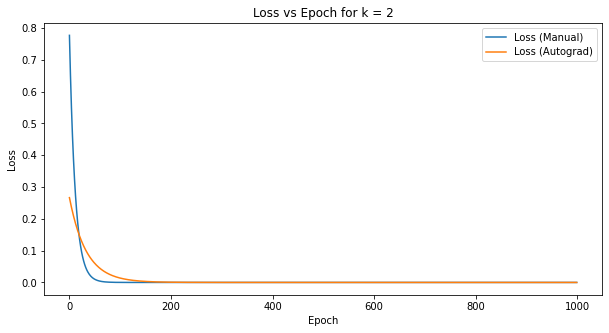

In [10]:
# Convert A, B, C, and x to PyTorch tensors
import torch
import matplotlib.pyplot as plt
A_auto = torch.tensor(A_for_auto, requires_grad=True, dtype=torch.float32)
B_auto = torch.tensor(B_for_auto, requires_grad=True, dtype=torch.float32)
C_auto = torch.tensor(C_for_auto, requires_grad=True, dtype=torch.float32)
x = torch.tensor(x, dtype=torch.float32)

# Training loop using torch.autograd
Loss_list_autograd = []
for epoch in range(num_epochs):
    # Forward propagation using torch.autograd
    Ax = torch.matmul(A_auto, x)
    Bx = torch.matmul(B_auto, x)
    z = torch.sigmoid(Ax) + Bx
    w = torch.matmul(C_auto, z)
    L = torch.sum(w ** 2)

    # Backpropagation using torch.autograd
    L.backward()

    # Extract gradients computed by torch.autograd
    gradient_A_autograd = A_auto.grad
    gradient_B_autograd = B_auto.grad
    gradient_C_autograd = C_auto.grad

    # Gradient descent to update A, B, and C using torch.autograd
    with torch.no_grad():
        A_auto -= learning_rate * gradient_A_autograd
        B_auto -= learning_rate * gradient_B_autograd
        C_auto -= learning_rate * gradient_C_autograd

    # Clear gradients
    A_auto.grad = None
    B_auto.grad = None
    C_auto.grad = None

    # store the loss value for each epoch
    Loss_list_autograd.append(L.item())

# Compare the loss curves
plt.figure(figsize=(10, 5))
plt.plot(range(num_epochs), Loss_list, label="Loss (Manual)")
plt.plot(range(num_epochs), Loss_list_autograd, label="Loss (Autograd)")
plt.xlabel("Epoch")
title = "Loss vs Epoch for k = {}".format(K)
plt.title(title)
plt.ylabel("Loss")
plt.legend()
plt.show()

In [11]:
A

[[0.6389743455144645, 0.025893269914322375],
 [0.274935575979845, 0.2174777704866141]]

In [12]:
A_auto

tensor([[0.6385, 0.0183],
        [0.2739, 0.2149]], requires_grad=True)